# **Tubsamon Dusitsopittawong 6210422010**

## **Load libraries and data**

In [6]:
!pip install mlxtend

In [7]:
import pandas as pd

df = pd.read_excel('Customer Preference Survey (การตอบกลับ)_new.xlsx')

In [8]:
df.head(10)

,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,2021-03-20 11:53:44.586,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1.0,0,0,0,0,1,0,1,1,0,1,0.0,0,1,1,0,0,0,0,1,1,0.0,1,0,0,0.0,0,0,0,0.0,0,0.0,0,0,1,1,1
1,2021-03-20 11:54:00.984,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1.0,0,0,1,1,0,0,1,1,0,0,0.0,0,0,1,0,0,0,0,1,0,1.0,1,1,0,1.0,0,1,0,0.0,0,1.0,1,0,1,0,1
2,2021-03-20 11:54:05.084,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1.0,1,0,1,0,1,1,1,1,1,1,0.0,1,0,1,1,1,0,0,0,0,1.0,1,0,1,0.0,0,1,0,0.0,0,0.0,1,0,1,1,1
3,2021-03-20 11:54:12.558,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1.0,0,0,0,0,1,0,1,1,0,1,0.0,0,1,1,0,1,0,0,1,0,0.0,1,0,0,0.0,1,0,0,0.0,0,0.0,0,0,0,0,1
4,2021-03-20 11:54:18.477,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1.0,0,0,0,1,0,0,1,1,0,1,0.0,1,0,1,0,0,1,0,0,0,0.0,1,0,1,NaN,0,0,0,1.0,0,0.0,1,0,1,1,1
5,2021-03-20 11:54:20.911,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,1.0,0,0,1,0,1,0,1,1,0,0,0.0,1,0,1,0,0,0,0,1,0,0.0,1,0,1,0.0,0,1,0,0.0,0,NaN,1,0,0,0,1
6,2021-03-20 11:54:33.800,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1.0,0,0,0,0,1,0,1,1,0,1,0.0,1,0,1,0,0,0,0,0,0,0.0,1,1,0,0.0,0,1,0,0.0,0,0.0,1,0,1,1,1
7,2021-03-20 11:54:40.338,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,1,1,0,NaN,0,0,0,0,0,0,1,1,0,1,0.0,0,0,1,0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,NaN,0,0.0,0,0,0,0,1
8,2021-03-20 11:54:45.776,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,1,1,1,1.0,0,0,0,1,1,0,1,1,0,1,0.0,0,0,1,1,0,0,0,0,0,1.0,1,0,0,1.0,0,0,0,0.0,1,1.0,0,0,0,1,1
9,2021-03-20 11:54:46.611,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,1.0,0,0,0,0,1,0,1,1,0,0,0.0,1,0,1,0,0,0,0,0,0,0.0,1,0,0,0.0,0,1,0,0.0,0,0.0,0,0,0,1,1


## **Check missing data**

In [9]:
missing = df.isnull().sum()
print(missing)

ประทับเวลา                       0
จักรยานเสือภูเขา                 0
คอลลาเจน                         0
Brownie อวกาศ                    0
แม่โขง                           0
                                ..
หมอนสุขภาพสำหรับคนนอนไม่หลับ     0
อาหารแมวคลีนเพื่อสุขภาพลดหุ่น    0
น้ำส้มดีโด้                      0
Software ถูกลิขสิทธิ์            0
ครีมกันแดด                       0
Length: 62, dtype: int64


In [10]:
df = df.dropna()
del df['ประทับเวลา']
df.head(5)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1.0,0,0,0,0,1,0,1,1,0,1,0.0,0,1,1,0,0,0,0,1,1,0.0,1,0,0,0.0,0,0,0,0.0,0,0.0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1.0,0,0,1,1,0,0,1,1,0,0,0.0,0,0,1,0,0,0,0,1,0,1.0,1,1,0,1.0,0,1,0,0.0,0,1.0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1.0,1,0,1,0,1,1,1,1,1,1,0.0,1,0,1,1,1,0,0,0,0,1.0,1,0,1,0.0,0,1,0,0.0,0,0.0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1.0,0,0,0,0,1,0,1,1,0,1,0.0,0,1,1,0,1,0,0,1,0,0.0,1,0,0,0.0,1,0,0,0.0,0,0.0,0,0,0,0,1
6,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1.0,0,0,0,0,1,0,1,1,0,1,0.0,1,0,1,0,0,0,0,0,0,0.0,1,1,0,0.0,0,1,0,0.0,0,0.0,1,0,1,1,1


## **Turn float into integer**

In [11]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = df.applymap(encode_units)
hot_encoded_df['Transaction']=range(1, len (df) + 1)
hot_encoded_df = hot_encoded_df.set_index('Transaction')
hot_encoded_df

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
2,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1
3,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1
4,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,1,1
6,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,1,1,1,1,0,0,0,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,1
7,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1
8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1
9,1,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1


# **Determine product association using apriori**

In [12]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_df, min_support=0.5, use_colnames=True)

# **List out rules**

In [13]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(คอลลาเจน),(กะหรี่(ปั๊บ)),0.560976,0.951220,0.536585,0.956522,1.005574,0.002974,1.121951
1,(กะหรี่(ปั๊บ)),(คอลลาเจน),0.951220,0.560976,0.536585,0.564103,1.005574,0.002974,1.007174
2,(คอลลาเจน),(กระเป๋า),0.560976,1.000000,0.560976,1.000000,1.000000,0.000000,inf
3,(กระเป๋า),(คอลลาเจน),1.000000,0.560976,0.560976,0.560976,1.000000,0.000000,1.000000
4,(คอลลาเจน),(ชาบู),0.560976,1.000000,0.560976,1.000000,1.000000,0.000000,inf


In [14]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(คอลลาเจน),(กะหรี่(ปั๊บ)),0.560976,0.951220,0.536585,0.956522,1.005574,0.002974,1.121951
2,(คอลลาเจน),(กระเป๋า),0.560976,1.000000,0.560976,1.000000,1.000000,0.000000,inf
4,(คอลลาเจน),(ชาบู),0.560976,1.000000,0.560976,1.000000,1.000000,0.000000,inf
7,(คอลลาเจน),(เม็ดมะม่วงหิมพานต์),0.560976,0.902439,0.512195,0.913043,1.011751,0.005949,1.121951
8,(คอลลาเจน),(โรตี),0.560976,0.975610,0.560976,1.000000,1.025000,0.013682,inf
...,...,...,...,...,...,...,...,...,...
290730,"(หมอนข้าง, เนื้อวากิล, กะหรี่(ปั๊บ))","(เม็ดมะม่วงหิมพานต์, โรตี, ครีมกันแดด, เนื้อย่...",0.585366,0.634146,0.512195,0.875000,1.379808,0.140988,2.926829
290731,"(หมอนข้าง, เนื้อวากิล, กระเป๋า)","(เม็ดมะม่วงหิมพานต์, กะหรี่(ปั๊บ), โรตี, ครีมก...",0.609756,0.609756,0.512195,0.840000,1.377600,0.140393,2.439024
290755,"(หมูแดดเดียว, เนื้อย่าง)","(เม็ดมะม่วงหิมพานต์, โรตี, ครีมกันแดด, หมอนข้า...",0.634146,0.560976,0.512195,0.807692,1.439799,0.156454,2.282927
290758,"(เนื้อวากิล, หมูแดดเดียว)","(เม็ดมะม่วงหิมพานต์, โรตี, ครีมกันแดด, เนื้อย่...",0.609756,0.609756,0.512195,0.840000,1.377600,0.140393,2.439024


In [15]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

--2021-06-15 17:47:36--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2021-06-15 17:47:36--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.01s   

2021-06-15 17:47:36 (7.05 MB/s) - ‘t

In [16]:
import matplotlib.font_manager as fm
 
font_list = fm.createFontList(['thsarabunnew-webfont.ttf'])
fm.fontManager.ttflist.extend(font_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  This is separate from the ipykernel package so we can avoid doing imports until


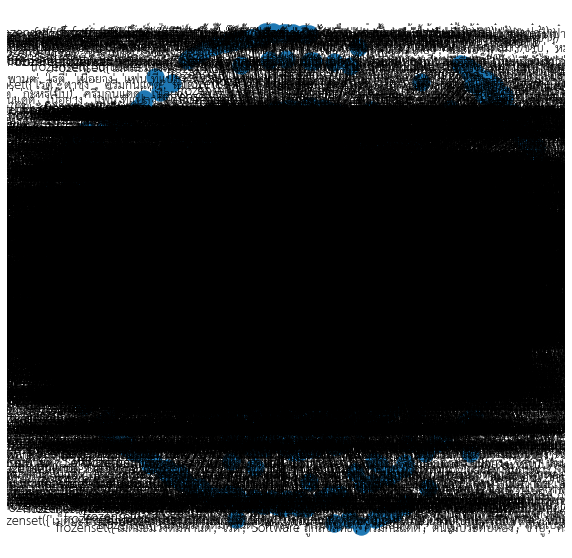

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,10))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True,font_family='TH Sarabun New')
plt.show()

In [19]:
item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)

In [20]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df.iloc[:,i],hot_encoded_df.iloc[:,j])

In [21]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [22]:
links_filtered=links.loc[ (links['value'] > 0.3) & 
                         (links['item'] != links['related item']) ]

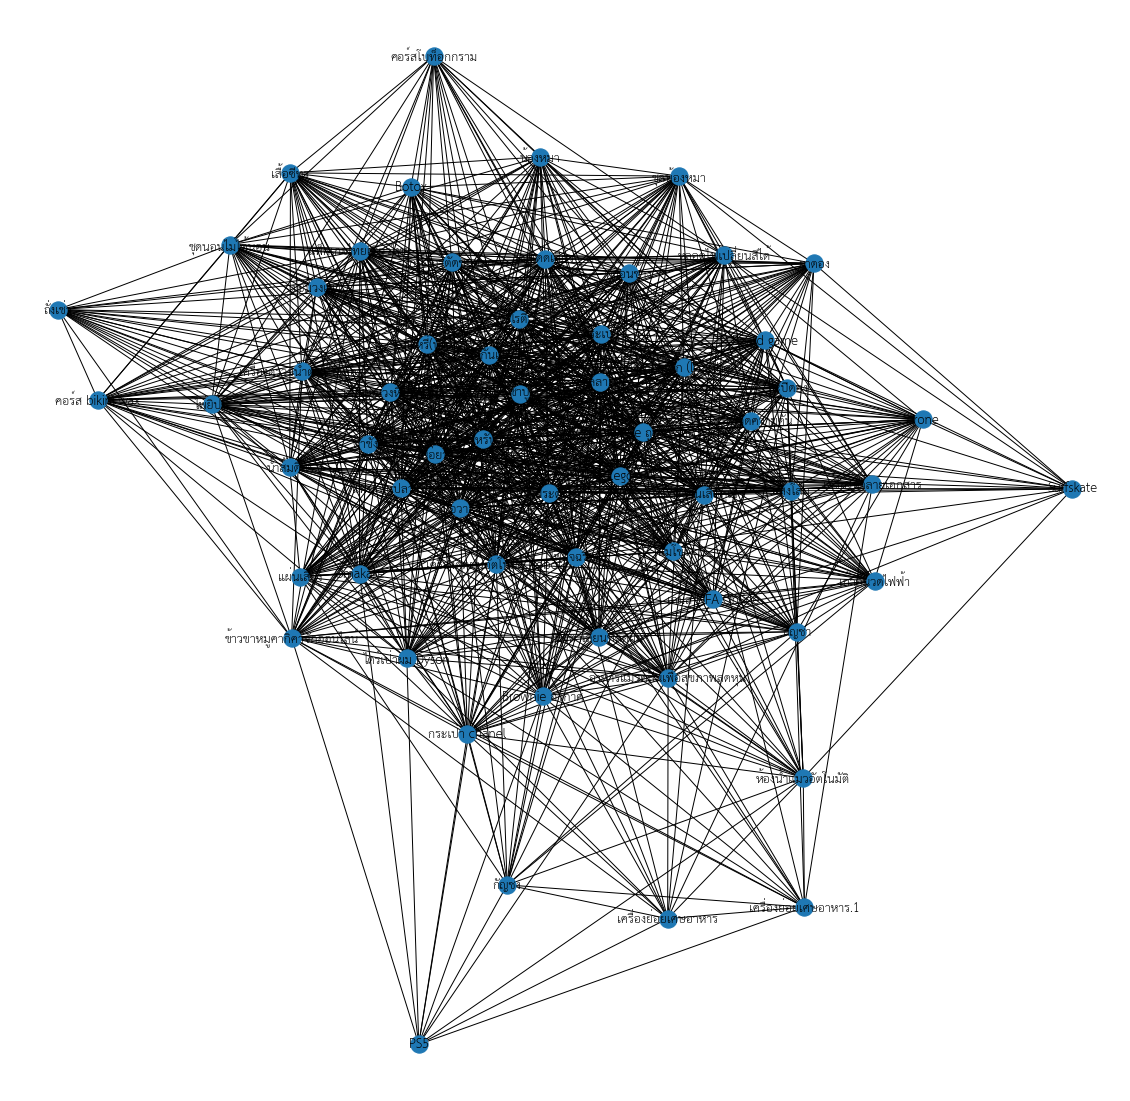

In [25]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(20,20))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True,font_family='TH Sarabun New')
plt.show()